# The linear regression assumptions

In this notebook we're going to look at 2 of the required assumptions for linear regression

The linearity assumption
and the absence of collinearity assumption

We continue to work on the advertising dataset

Let's import the packages and load the dataset into a pandas dataframe


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

df = pd.read_csv('./data/advertising.csv')
df.shape


(200, 4)

In [2]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Linearity
Let's work on the Sales vs TV relation.

The scatterplot of both variables shows that there is a certain linearity between the 2 variables.
We can clearly see a line shape.


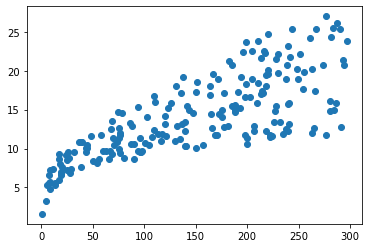

In [3]:
plt.scatter(df.TV, df.Sales)


Now for comparison let's create 2 new variables: square root and square of TV

and plot their respective scatter plots


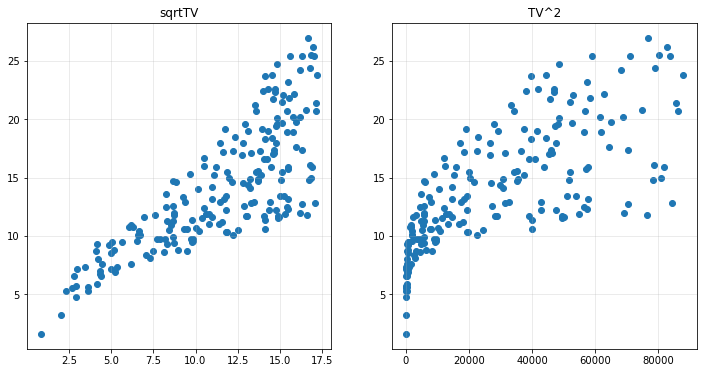

In [15]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
plt.subplot(1,2,1)
df['sqrtTV'] = np.sqrt(df.TV)
plt.scatter(df.sqrtTV, df.Sales)
plt.grid(alpha = 0.3)
plt.title('sqrtTV');


plt.subplot(1,2,2)
df['sqTV'] = np.square(df.TV)
plt.scatter(df.sqTV, df.Sales)
plt.grid(alpha = 0.3)
plt.title('TV^2');



The relationship between Sales and the sqrtTV variable appears to be the most linear one.

Now let's compare the 3 univariate models


In [16]:
formulas = ['Sales ~ TV', 'Sales ~ sqTV', 'Sales ~ sqrtTV']

for formula in formulas:
    result = smf.ols(formula, data = df).fit()
    print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           1.47e-42
Time:                        15:57:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

The Sales vs sqrt of TV model has the best R^2, log likelihood and so forth of the 3 models.
Which shows that having linearity between the predictors and the outcome improves the model.

## Collinearity

Now we turn to collinearity and show two ways to detect it

First the VIF or Variance inflation Factor


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


The VIF is calculated for each predictor
by passing the list of predictors
and the index of the predictor  in the list.

For instance, we get the VIF for TV by passing the zero index
since TV is the first element in the list


In [18]:
vif(df[['TV', 'Radio', 'Newspaper']].values, 0)

2.486771835198193

And the VIF for Radio and Newspaper with indexes 1 and 2

In [19]:
vif(df[['TV', 'Radio', 'Newspaper']].values, 1)


3.285462100162896

In [21]:
vif(df[['TV', 'Radio', 'Newspaper']].values, 2)

3.0552445106573853

Since all of the VIF values are below 5,
we can conclude that we do not have collinearity in our dataset.

We can also infer collinearity with the Condition number.
A condition number b elow the value of 20 indicates that collinearity is not degrading the quality of the model.

But first
for the Cond Number to make sense we must normalize the predictors


In [27]:
df['TV'] = (df.TV ) / np.std(df.TV)
df['Radio'] = (df.Radio ) / np.std(df.Radio)
df['Newspaper'] = (df.Newspaper ) / np.std(df.Newspaper)

df[['TV','Radio', 'Newspaper']].std()


TV           1.002509
Radio        1.002509
Newspaper    1.002509
dtype: float64

Then we run the usual linear regression

In [28]:
result = smf.ols('Sales ~ TV + Radio + Newspaper' , data = df).fit()

Which gives a condition number of 8.5 confirming that collinearity in the dataset does not impact our model.


In [29]:
result.condition_number

8.493593332501176